In [26]:
%matplotlib inline

# pip install github3.py command for install github3
# execute pip install github3.py command from the the command window/terminal
import github3, json
import os
#import cPickle as pickle
import pandas as pd                                    # panda's nickname is pd
from fbprophet import Prophet
import numpy as np                                     # numpy as np
from pandas import DataFrame, Series                   # for convenience
import matplotlib.pyplot as plt

from scipy import stats


import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [27]:
# Get an API key for GitHub and set it as GITHUB_TOKEN
# Here is the URL to generate your GITHUB_TOKEN
# https://help.github.com/articles/creating-an-access-token-for-command-line-use/

GITHUB_TOKEN = 'd14e9f79e44f66bdc12e09bee463a3bd1225c98f'
ORG = 'SPM587SP19'                     
REPO = 'SCM587SP19'
FILENAME_ISSUES = ORG + '_stats_issues.json'
FILENAME_PULL = ORG + '_stats_PULL.json'
FILENAME_COMMIT = ORG + '_stats_commit.json' 

In [28]:
gh = github3.login(token=GITHUB_TOKEN)

f = open(FILENAME_ISSUES, 'w')
for issue in gh.search_issues('type:issues repo:SPM587SP19/SCM587SP19'):          
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['Issues'] = 1
            data['created_at']= current_issue["created_at"][0:10]                 
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               
            data['State'] = current_issue["state"]                                
            out=json.dumps(data)                                                  
            f.write(out+ '\n')
f.close()

INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned


In [29]:
import json
listOfIssues = [json.loads(line) for line in open(FILENAME_ISSUES)]
Issuesdf = DataFrame(listOfIssues)
Issuesdf.head()

,Issues,State,closed_at,created_at
0,1,open,None,2019-04-21
1,1,open,None,2019-04-21
2,1,open,None,2019-04-21
3,1,open,None,2019-04-21
4,1,open,None,2019-04-21


## Re-implement the above 6 requirements (listed for Facebook prophet package) using StatsModel :

In [30]:
Issuesdf['created_at'] = pd.to_datetime(Issuesdf['created_at'], errors='coerce')
i = Issuesdf.groupby(Issuesdf['created_at'].dt.date).sum().reset_index()
i

,created_at,Issues
0,2019-03-24,1
1,2019-03-29,2
2,2019-03-30,9
3,2019-03-31,42
4,2019-04-01,12
5,2019-04-02,35
6,2019-04-03,37
7,2019-04-04,10
8,2019-04-05,27
9,2019-04-06,3


In [31]:
i.index = i["created_at"]
del i["created_at"]
i

,Issues
created_at,
2019-03-24,1
2019-03-29,2
2019-03-30,9
2019-03-31,42
2019-04-01,12
2019-04-02,35
2019-04-03,37
2019-04-04,10
2019-04-05,27


In [32]:
arma_mod30 = sm.tsa.ARMA(i, (3,0)).fit(disp=False)

C:\Users\raksh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


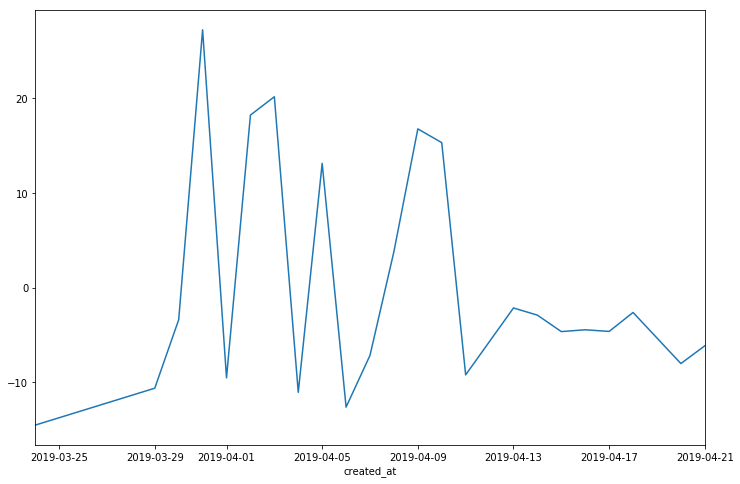

In [33]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [34]:
predict_stats = arma_mod30.predict(dynamic=True)
print(predict_stats)

created_at
2019-03-31    14.776413
2019-04-01    16.189187
2019-04-02    16.164891
2019-04-03    15.735094
2019-04-04    15.527552
2019-04-05    15.466380
2019-04-06    15.480636
2019-04-07    15.498147
2019-04-08    15.507615
2019-04-09    15.509158
2019-04-10    15.508445
2019-04-11    15.507568
2019-04-13    15.507225
2019-04-14    15.507173
2019-04-15    15.507221
2019-04-16    15.507257
2019-04-17    15.507271
2019-04-18    15.507272
2019-04-20    15.507270
2019-04-21    15.507268
dtype: float64


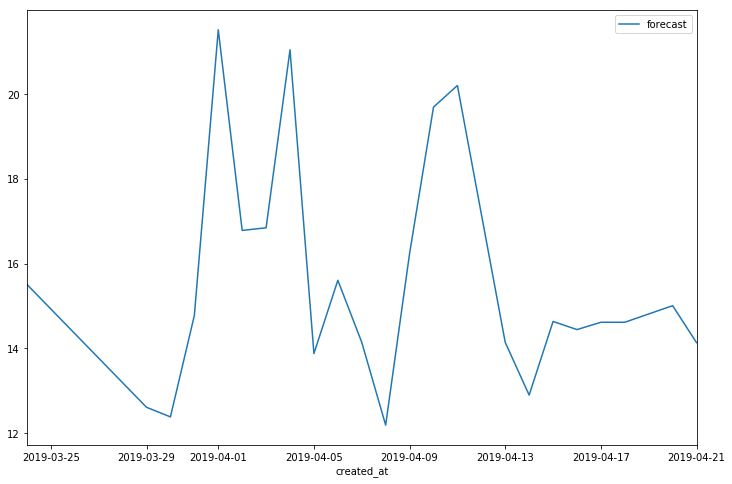

In [35]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#ax = i.plot(ax=ax)
fig = arma_mod30.plot_predict(plot_insample=False,ax=ax)

In [36]:
Issuesdf['closed_at'] = pd.to_datetime(Issuesdf['closed_at'], errors='coerce')
i_c = Issuesdf.groupby(Issuesdf['closed_at'].dt.date).sum().reset_index()
i_c.index = i_c["closed_at"]
del i_c["closed_at"]
i_c

,Issues
closed_at,
2019-03-31,25
2019-04-01,12
2019-04-02,34
2019-04-03,34
2019-04-04,14
2019-04-05,15
2019-04-06,3
2019-04-07,14
2019-04-08,16


C:\Users\raksh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


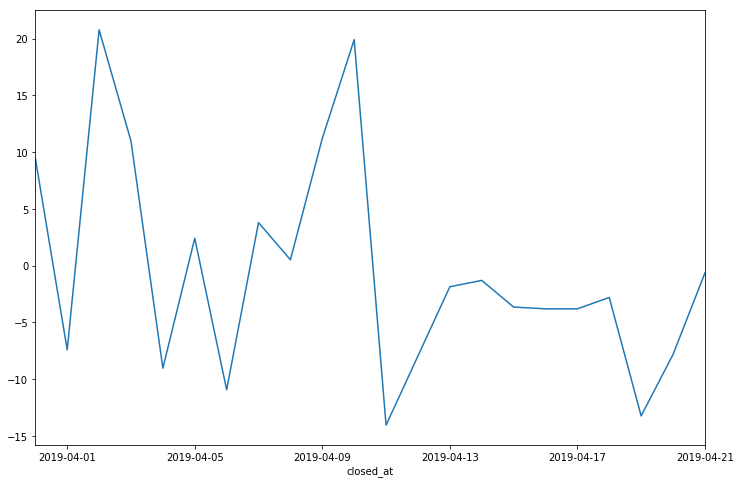

In [37]:
closed_arma_mod30 = sm.tsa.ARMA(i_c, (3,0)).fit(disp=False)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = closed_arma_mod30.resid.plot(ax=ax);

In [38]:
closed_predict_stats = closed_arma_mod30.predict(dynamic=True)
print(closed_predict_stats)

closed_at
2019-04-03    23.029119
2019-04-04    18.246243
2019-04-05    14.944603
2019-04-06    14.575536
2019-04-07    14.937600
2019-04-08    15.369737
2019-04-09    15.570683
2019-04-10    15.610515
2019-04-11    15.585079
2019-04-13    15.556500
2019-04-14    15.542078
2019-04-15    15.539065
2019-04-16    15.540633
2019-04-17    15.542579
2019-04-18    15.543592
2019-04-19    15.543823
2019-04-20    15.543727
2019-04-21    15.543595
dtype: float64


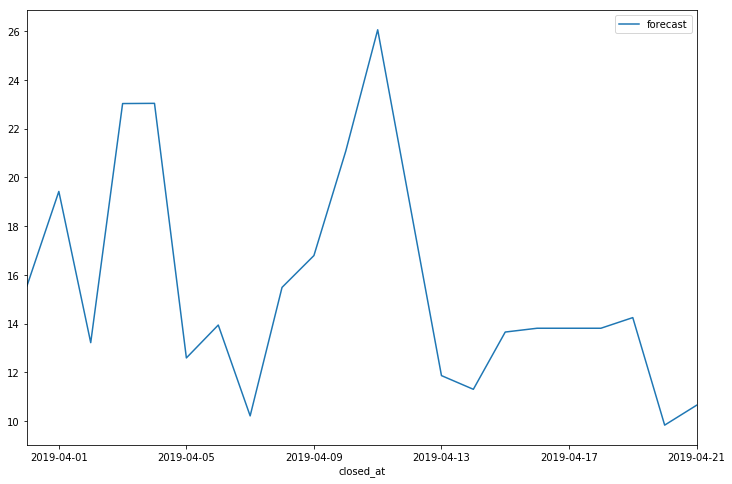

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#ax = i.plot(ax=ax)
fig = closed_arma_mod30.plot_predict(plot_insample=False,ax=ax)

In [40]:
gh = github3.login(token=GITHUB_TOKEN)

f = open(FILENAME_PULL, 'w')
for issue in gh.search_issues('type:issues repo:SPM587SP19/SCM587SP19'):          
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['PullCount'] = 1
            data['created_at']= current_issue["created_at"][0:10]                 
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               
            data['State'] = current_issue["state"]                                
            out=json.dumps(data)                                                  
            f.write(out+ '\n')
f.close()

import json
listOfPullReq = [json.loads(line) for line in open(FILENAME_PULL)]
PullReq = DataFrame(listOfPullReq)
PullReq.head()

PullReq['created_at'] = pd.to_datetime(PullReq['created_at'], errors='coerce')
pr = PullReq.groupby(PullReq['created_at'].dt.date).sum().reset_index()
pr.index = pr["created_at"]
del pr["created_at"]
pr



INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned


,PullCount
created_at,
2019-03-24,1
2019-03-29,2
2019-03-30,9
2019-03-31,42
2019-04-01,12
2019-04-02,35
2019-04-03,37
2019-04-04,10
2019-04-05,27


C:\Users\raksh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


created_at
2019-03-31    14.776413
2019-04-01    16.189187
2019-04-02    16.164891
2019-04-03    15.735094
2019-04-04    15.527552
2019-04-05    15.466380
2019-04-06    15.480636
2019-04-07    15.498147
2019-04-08    15.507615
2019-04-09    15.509158
2019-04-10    15.508445
2019-04-11    15.507568
2019-04-13    15.507225
2019-04-14    15.507173
2019-04-15    15.507221
2019-04-16    15.507257
2019-04-17    15.507271
2019-04-18    15.507272
2019-04-20    15.507270
2019-04-21    15.507268
dtype: float64


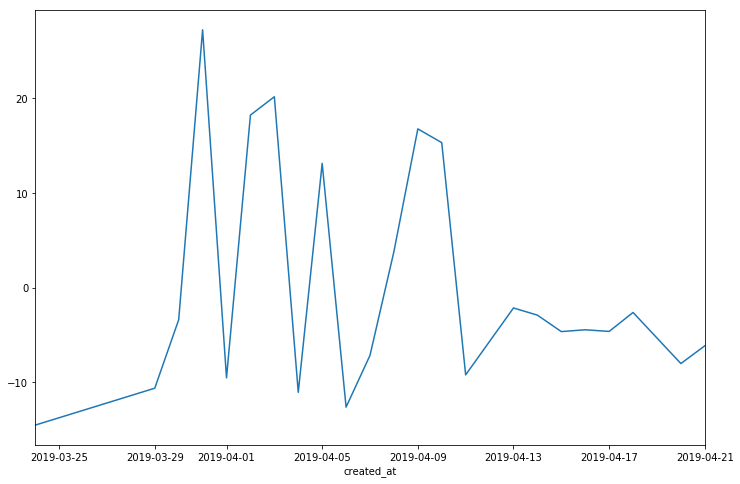

In [41]:
pull_arma_mod30 = sm.tsa.ARMA(pr, (3,0)).fit(disp=False)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = pull_arma_mod30.resid.plot(ax=ax);
pull_predict_stats = pull_arma_mod30.predict(dynamic=True)
print(pull_predict_stats)

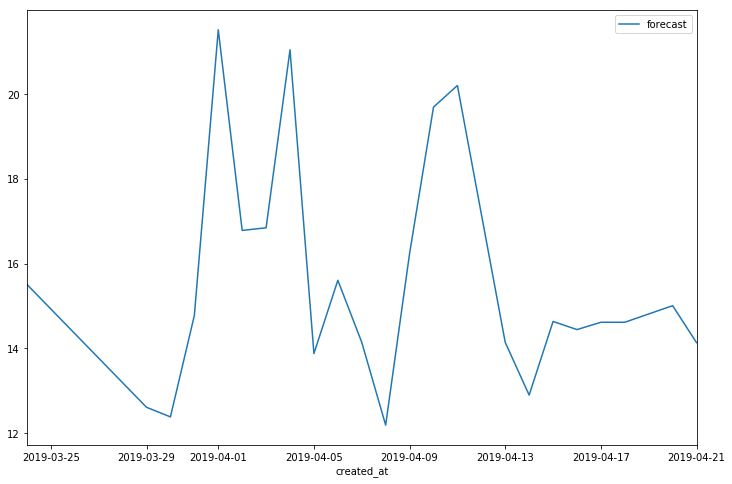

In [42]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#ax = i.plot(ax=ax)
fig = pull_arma_mod30.plot_predict(plot_insample=False,ax=ax)

In [43]:
gh = github3.login(token=GITHUB_TOKEN)

f = open(FILENAME_COMMIT, 'w')

repo = gh.repository('RSP19SCM71C' , 'SCM587SP19' )
repostats = repo.contributors()
for i in repo.commits():
    data = {}
    item = i.as_json()
    item = json.loads(item)
    data['commit_count'] = 1
    data['created_at']= item["commit"]["committer"]["date"][0:10]
    out=json.dumps(data)                                                  # save this all information to a JSON file
    f.write(out+ '\n')
f.close()


import json
listOfCommitReq = [json.loads(line) for line in open(FILENAME_COMMIT)]
CommitReq = DataFrame(listOfCommitReq)
CommitReq.head()

CommitReq['created_at'] = pd.to_datetime(CommitReq['created_at'], errors='coerce')
cr = CommitReq.groupby(CommitReq['created_at'].dt.date).sum().reset_index()
cr.index = cr["created_at"]
del cr["created_at"]
cr


INFO:github3:Building a url from ('https://api.github.com', 'repos', 'RSP19SCM71C', 'SCM587SP19')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com/repos/RSP19SCM71C/SCM587SP19', 'contributors')
INFO:github3:Building a url from ('https://api.github.com/repos/RSP19SCM71C/SCM587SP19', 'commits')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned


,commit_count
created_at,
2019-03-24,3
2019-03-27,1
2019-03-28,15
2019-03-29,27
2019-04-01,2
2019-04-02,85
2019-04-03,67
2019-04-04,51
2019-04-05,16


C:\Users\raksh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


created_at
2019-03-29    29.524978
2019-04-01    35.703748
2019-04-02    34.021028
2019-04-03    29.148774
2019-04-04    25.474610
2019-04-05    24.545917
2019-04-06    25.604078
2019-04-07    27.079906
2019-04-08    27.919183
2019-04-09    27.935310
dtype: float64


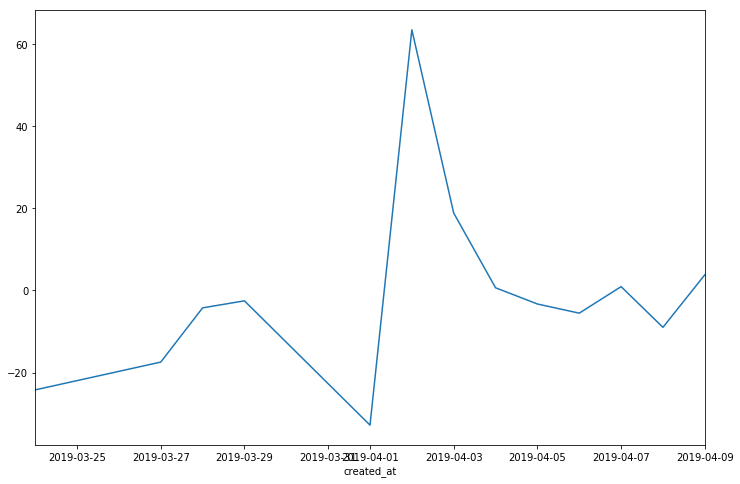

In [44]:
req_arma_mod30 = sm.tsa.ARMA(cr, (3,0)).fit(disp=False)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = req_arma_mod30.resid.plot(ax=ax);
req_predict_stats = req_arma_mod30.predict(dynamic=True)
print(req_predict_stats)

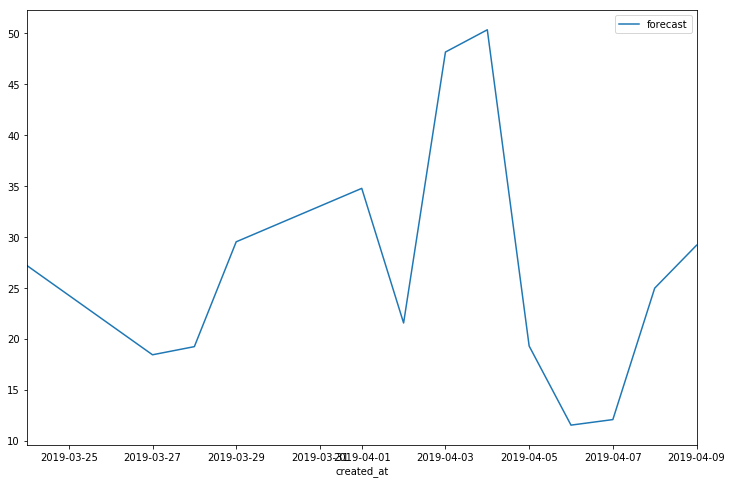

In [45]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#ax = i.plot(ax=ax)
fig = req_arma_mod30.plot_predict(plot_insample=False,ax=ax)